# Import Libraries

In [2]:
import bnlearn as bn
import pandas as pd


# Import DAG and Generate data

In [13]:
DAG = bn.import_DAG('insurance.bif',verbose=False)

In [15]:
df = bn.sampling(DAG, n=10000)
df

,SocioEcon,GoodStudent,Age,RiskAversion,VehicleYear,Accident,ThisCarDam,RuggedAuto,MakeModel,Antilock,...,AntiTheft,HomeBase,OtherCarCost,PropCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,1,1,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,1,0,2,2,1,1,1,...,1,2,2,2,0,0,2,0,0,2
2,2,1,1,2,0,0,0,1,2,1,...,0,2,0,0,0,0,2,0,0,0
3,1,1,1,2,0,0,0,1,2,1,...,1,0,0,0,1,0,2,0,0,0
4,2,1,1,2,0,0,0,2,2,0,...,0,2,0,1,0,0,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,2,3,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
9996,1,0,0,2,1,0,0,1,2,1,...,1,2,0,0,0,0,1,1,0,0
9997,0,1,0,1,1,2,3,0,1,1,...,1,3,2,2,0,0,0,1,0,1
9998,0,1,0,1,1,0,0,0,1,1,...,1,1,0,1,1,0,1,1,0,2


# Implementing Chow-Liu Algorithm

In [28]:
# Pairwise
DAG1 = bn.structure_learning.fit(df,methodtype='chow-liu')


[bnlearn] >Computing best DAG using [chow-liu]


Building tree:   0%|          | 0/351.0 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).


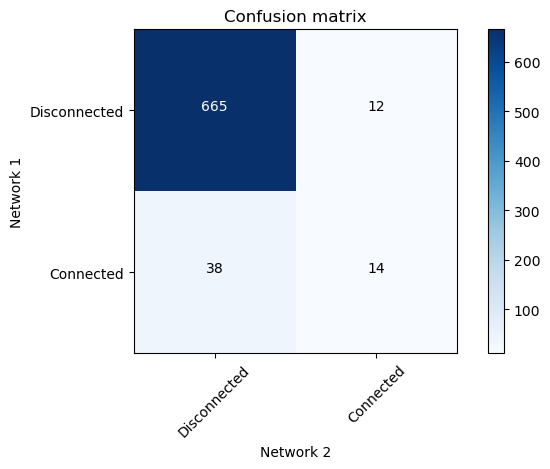

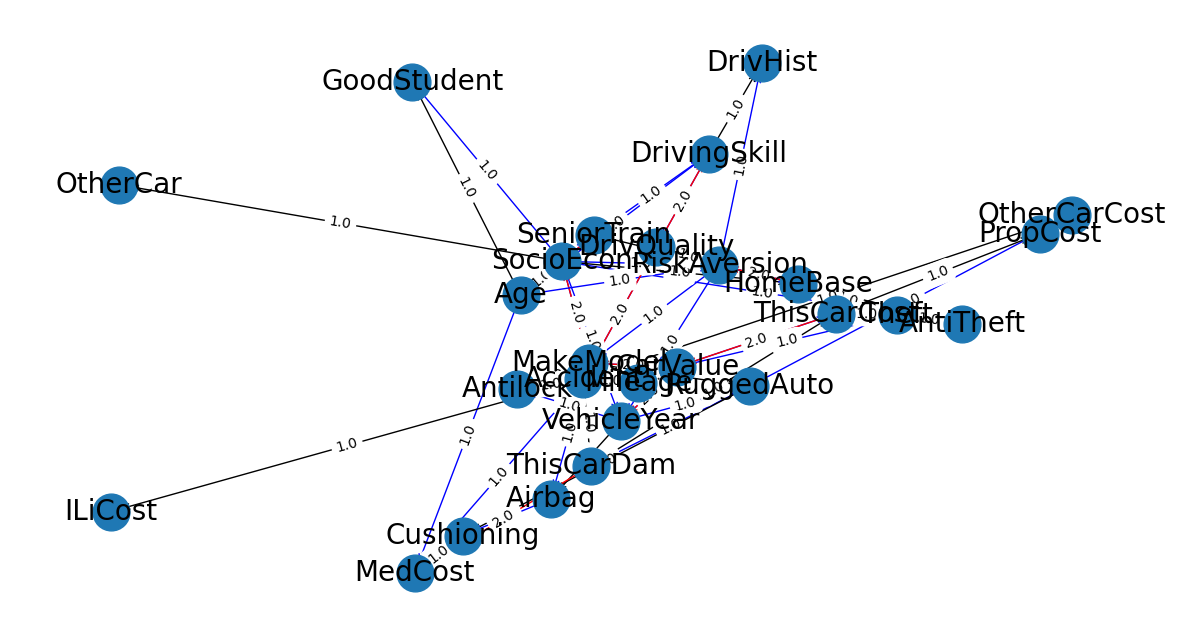

In [38]:
result1=pd.DataFrame(bn.compare_networks(DAG, DAG1,verbose=False)[1])

### Adjmatrix

In [39]:
result1

target,SocioEcon,GoodStudent,Age,RiskAversion,VehicleYear,Accident,ThisCarDam,RuggedAuto,MakeModel,Antilock,...,AntiTheft,HomeBase,OtherCarCost,PropCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
source,,,,,,,,,,,,,,,,,,,,,
SocioEcon,0,-1,0,-1,-1,0,0,0,-1,0,...,-1,1,0,0,1,0,0,0,0,0
GoodStudent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Age,-1,1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
RiskAversion,0,0,0,0,-1,0,0,0,-1,0,...,1,-1,0,0,0,0,0,0,0,-1
VehicleYear,0,0,0,0,0,0,0,-1,0,-1,...,0,0,0,0,0,0,0,1,0,0
Accident,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,-1,0,0,1,0
ThisCarDam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
RuggedAuto,0,0,0,0,0,0,-1,0,0,0,...,0,0,-1,0,0,0,1,0,0,0
MakeModel,2,0,0,0,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,-1,0,0


# Implementing Hill-Climb Algorithm

In [33]:
#Score_based
DAG2 = bn.structure_learning.fit(df,methodtype='hillclimbsearch')


[bnlearn] >Computing best DAG using [hillclimbsearch]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


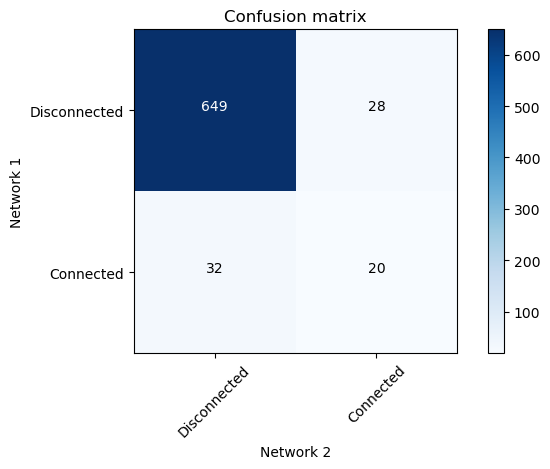

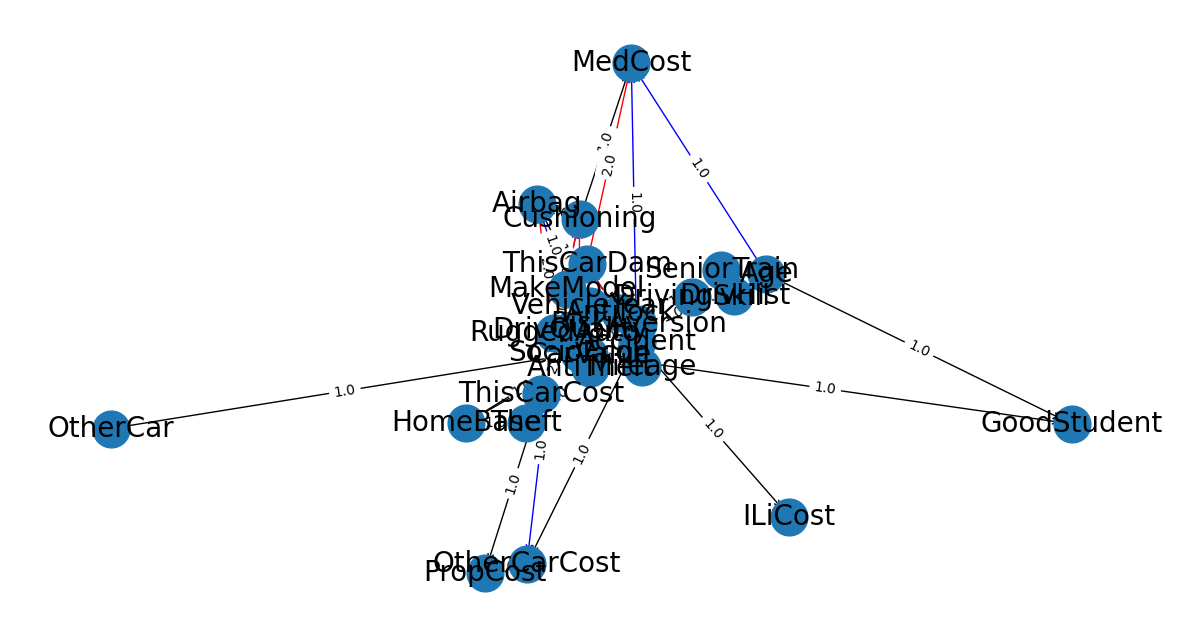

In [40]:
result2=pd.DataFrame(bn.compare_networks(DAG, DAG2,verbose=False)[1])

### Adjmatrix

In [41]:
result2

target,SocioEcon,GoodStudent,Age,RiskAversion,VehicleYear,Accident,ThisCarDam,RuggedAuto,MakeModel,Antilock,...,AntiTheft,HomeBase,OtherCarCost,PropCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
source,,,,,,,,,,,,,,,,,,,,,
SocioEcon,0,1,0,-1,-1,0,0,2,1,0,...,-1,1,0,0,1,0,2,0,0,0
GoodStudent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Age,-1,1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0
RiskAversion,2,0,2,0,-1,0,0,0,-1,0,...,-1,1,0,0,0,0,0,0,0,1
VehicleYear,0,0,0,0,0,0,0,-1,0,-1,...,0,0,0,0,0,0,0,1,0,0
Accident,0,0,0,0,0,0,-1,0,0,0,...,0,0,1,0,0,-1,0,0,1,0
ThisCarDam,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
RuggedAuto,0,0,0,0,0,2,-1,0,2,0,...,0,0,-1,0,0,0,-1,2,0,0
MakeModel,0,0,0,0,2,0,0,-1,0,1,...,0,0,0,0,0,0,0,-1,0,0


# Implementing PC Algorithm

In [35]:
# Constraint based
DAG3 = bn.structure_learning.fit(df,methodtype='constraintsearch')

[bnlearn] >Computing best DAG using [constraintsearch]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. Method [constraintsearch] not supported.


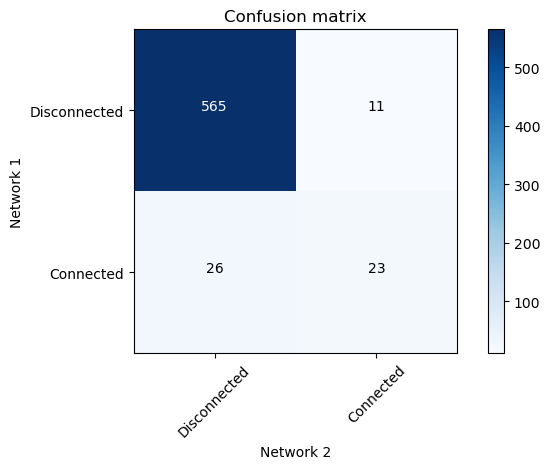

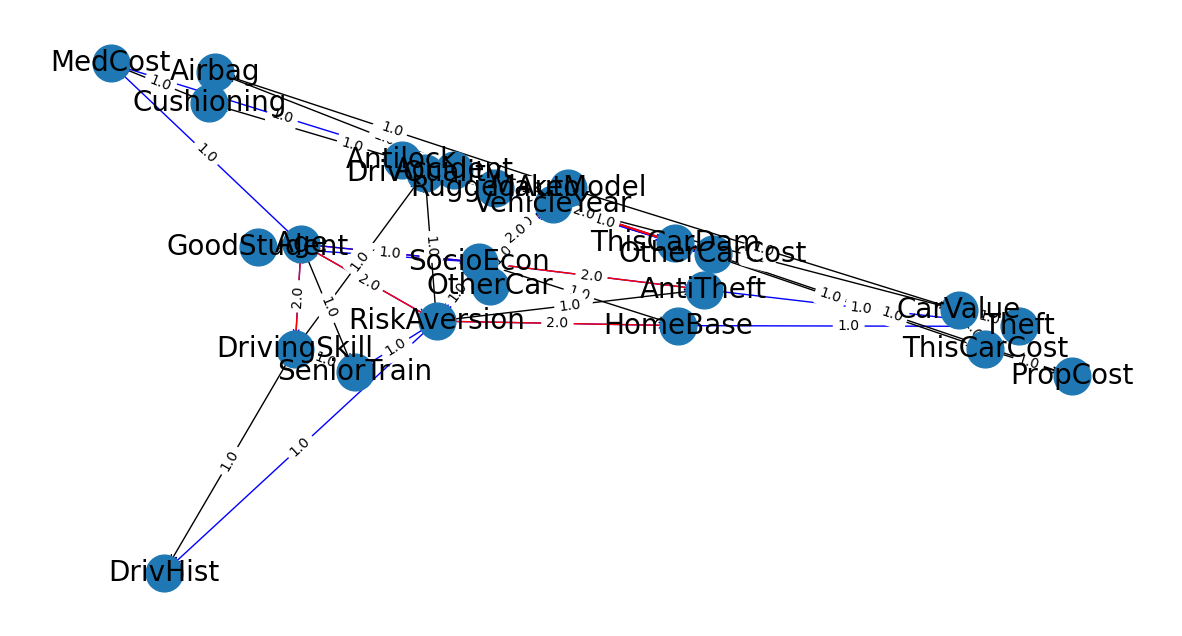

In [43]:
result3=pd.DataFrame(bn.compare_networks(DAG, DAG3,verbose=False)[1])

### Adjmatrix

In [44]:
result3

target,SocioEcon,GoodStudent,Age,RiskAversion,VehicleYear,Accident,ThisCarDam,RuggedAuto,MakeModel,Antilock,...,Theft,AntiTheft,HomeBase,OtherCarCost,PropCost,OtherCar,MedCost,Cushioning,Airbag,DrivHist
source,,,,,,,,,,,,,,,,,,,,,
SocioEcon,0,-1,2,-1,-1,0,0,0,1,0,...,0,-1,1,0,0,-1,0,0,0,0
GoodStudent,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Age,-1,-1,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
RiskAversion,0,0,2,0,-1,0,0,0,-1,0,...,0,1,-1,0,0,0,0,0,0,-1
VehicleYear,2,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
Accident,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,-1,0,0,-1,0,0,0
ThisCarDam,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RuggedAuto,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,-1,0,0,0,1,0,0
MakeModel,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
